In [55]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pylab import mpl 

In [71]:
th = 5.9 ## 报警温度阈值
rate = 0.6  ## 报警概率阈值

In [93]:
df = pd.read_csv("./data/process/PH_predict.csv",index_col=0)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df['index'] = df.index
df['date'] = df.index.date
df['month'] = df.index.strftime("%Y%m")
df['PH'] =df['PH']+th
df['label'] = df['label'].astype(int).map({0:"正常状态",1:"异常状态"})

In [94]:
df.head()

,PH,q3,q1,slope,value,iqr,label,Logistic,rate,index,date,month
time,,,,,,,,,,,,
2018-09-22 00:01:00,3.604615,-2.295385,-2.295385,0.000000,-2.483907,0.000000,正常状态,4.644079e-54,0.6,2018-09-22 00:01:00,2018-09-22,201809
2018-09-22 00:02:00,3.605641,-2.294615,-2.295128,0.001026,-2.482797,0.000513,正常状态,5.630356e-54,0.6,2018-09-22 00:02:00,2018-09-22,201809
2018-09-22 00:03:00,3.605641,-2.294359,-2.294872,0.000513,-2.482797,0.000513,正常状态,5.320697e-54,0.6,2018-09-22 00:03:00,2018-09-22,201809
2018-09-22 00:04:00,3.605242,-2.294359,-2.294914,0.000188,-2.482797,0.000556,正常状态,5.142705e-54,0.6,2018-09-22 00:04:00,2018-09-22,201809
2018-09-22 00:05:00,3.605755,-2.294359,-2.294758,0.000188,-2.482673,0.000399,正常状态,5.141773e-54,0.6,2018-09-22 00:05:00,2018-09-22,201809


In [95]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,5])
    temp = df.pivot_table(index= "index",columns = 'label',values = 'PH')
    plt.plot(temp['正常状态'], label = '正常状态', alpha = alpha, color = 'green')
    plt.plot(temp['异常状态'], label = '异常状态', alpha = alpha, color = 'red')
    
    t = pd.Series([6,6],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')    
    plt.xticks(rotation=20)
    plt.ylabel('吸收循环泵A出口PH')
    plt.legend(loc = 'upper left')
    return plt.show()

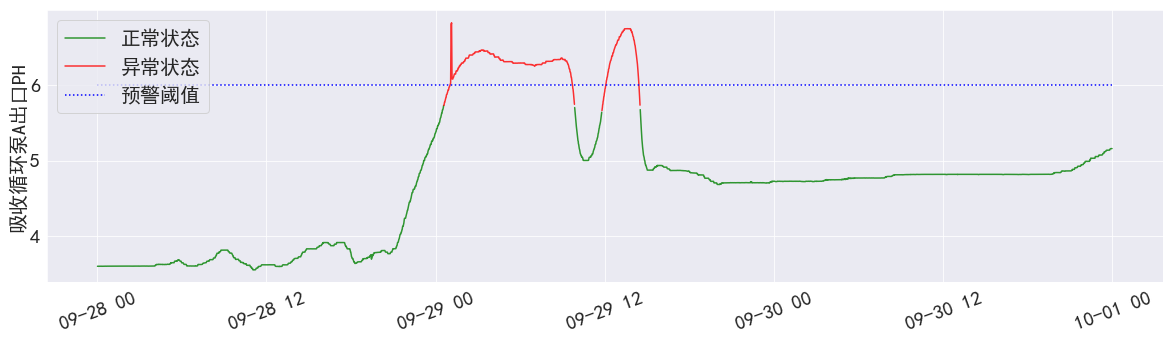

In [96]:
plot_temp_overview(df[(df.index>"2018-09-28")&(df.index<"2018-10-01")])

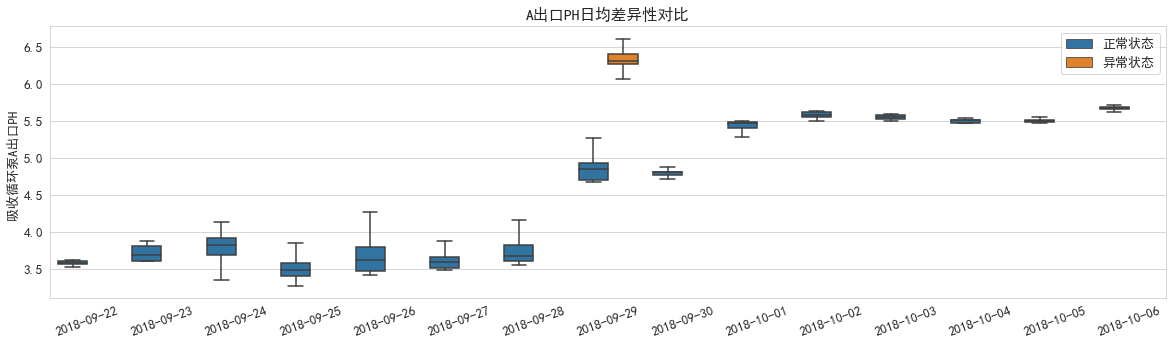

In [97]:
plt.figure(figsize=[20,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df,x= 'date',y = 'PH',hue='label',sym='')
plt.title('A出口PH日均差异性对比')
plt.xlabel('')
plt.xticks(rotation=20)
plt.ylabel(u'吸收循环泵A出口PH ')
plt.legend()

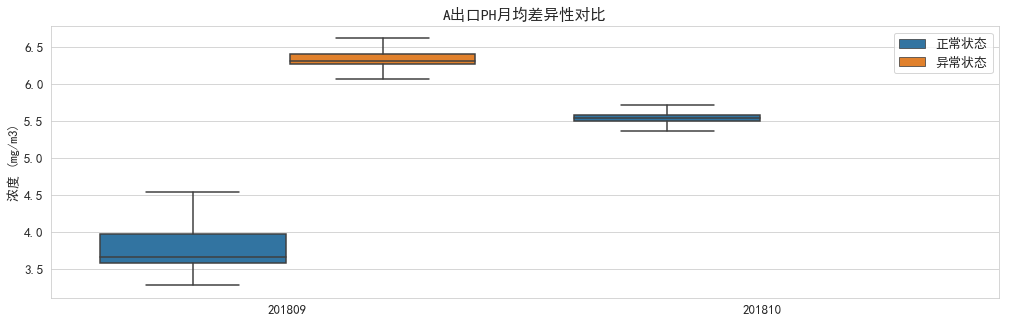

In [99]:
plt.figure(figsize=[17,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df,x= 'month',y = 'PH',hue='label',sym='')
plt.title('A出口PH月均差异性对比')
plt.xlabel('')
# plt.xticks(rotation=20)
plt.ylabel(u'浓度 (mg/m3)')
plt.legend()

Text(0, 0.5, '浓度 (mg/m3)')

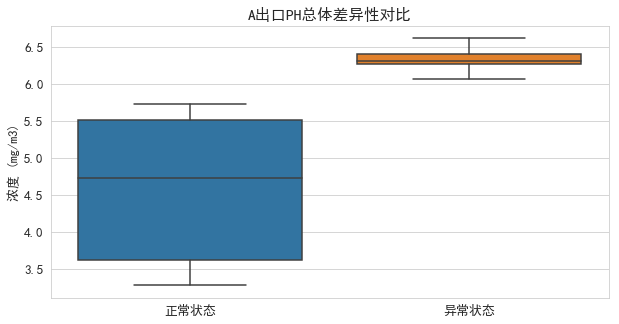

In [100]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df,x= 'label',y = 'PH',sym='')
plt.title('A出口PH总体差异性对比')
plt.xlabel('')
# plt.xticks(rotation=20)
plt.ylabel(u'浓度 (mg/m3)')

In [101]:
def plot_temp_overview(df, alpha = 0.8,col = 'value',no=1):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[15,5])
    temp = df.pivot_table(index= "index",columns = 'label',values = col)
    plt.plot(temp['正常状态'], label = '正常状态', alpha = alpha, color = 'green')
    plt.plot(temp['异常状态'], label = '异常状态', alpha = alpha, color = 'red')
    
    t = pd.Series([0,0],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')    
    plt.xticks(rotation=20)
    plt.ylabel('')
    plt.legend(loc = 'upper left')
    plt.title(u'特征%d: %s'%(no,col))
    return plt.show()

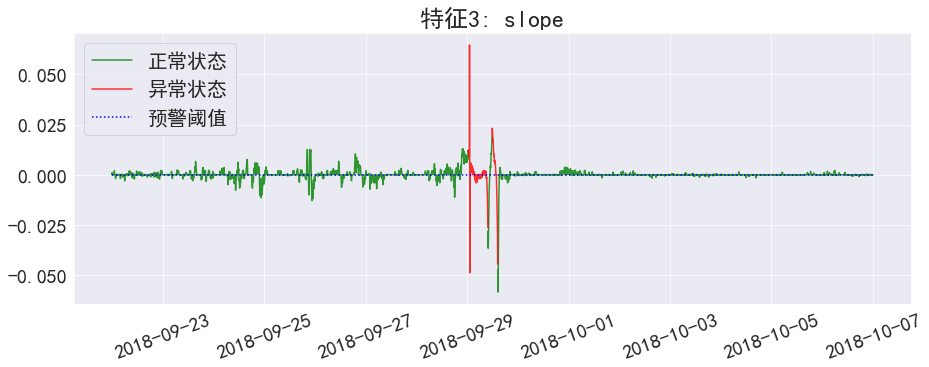

In [104]:
plot_temp_overview(df,col='slope',no = 3)

In [118]:
def plot_temp_overview(df, alpha = 0.8,col = 'value'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    plt.figure(figsize=[20,5])
    sns.set_style('whitegrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 13
    plt.rcParams['axes.unicode_minus'] = False
    plt.subplot(121)
    sns.boxplot(data = df,x= 'label',y = col,sym='')
    plt.title(u'特征 %s'%col)
    plt.xlabel('')
    plt.ylabel(u'浓度 (mg/m3)')
    plt.subplot(122)
    sns.distplot(a=df[df.label=='正常状态'][col],label='正常状态',bins=150)
    sns.distplot(a=df[df.label=='异常状态'][col],label='异常状态',bins=150)
    plt.xlabel('')
    plt.xlim(-0.02,0.02)
    plt.legend()
    return plt.show()

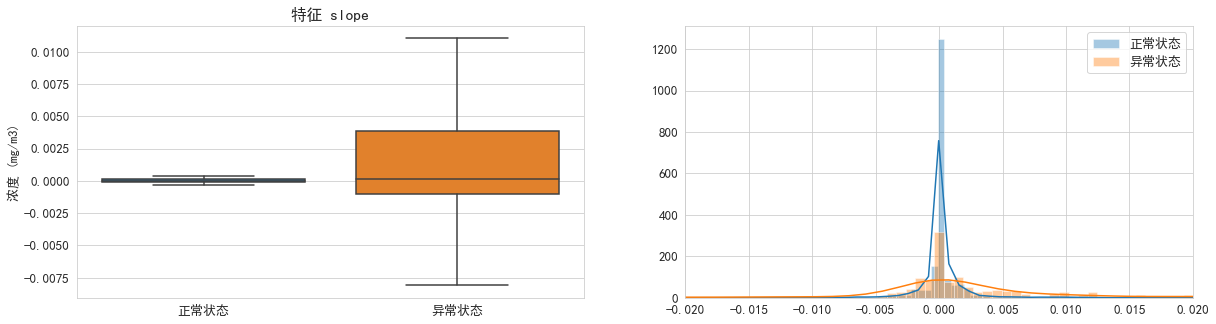

In [119]:
plot_temp_overview(df,col='slope')

In [125]:
df.head()

,PH,q3,q1,slope,value,iqr,label,Logistic,rate,index,date,month
time,,,,,,,,,,,,
2018-09-22 00:01:00,3.604615,-2.295385,-2.295385,0.000000,-2.483907,0.000000,正常状态,4.644079e-54,0.6,2018-09-22 00:01:00,2018-09-22,201809
2018-09-22 00:02:00,3.605641,-2.294615,-2.295128,0.001026,-2.482797,0.000513,正常状态,5.630356e-54,0.6,2018-09-22 00:02:00,2018-09-22,201809
2018-09-22 00:03:00,3.605641,-2.294359,-2.294872,0.000513,-2.482797,0.000513,正常状态,5.320697e-54,0.6,2018-09-22 00:03:00,2018-09-22,201809
2018-09-22 00:04:00,3.605242,-2.294359,-2.294914,0.000188,-2.482797,0.000556,正常状态,5.142705e-54,0.6,2018-09-22 00:04:00,2018-09-22,201809
2018-09-22 00:05:00,3.605755,-2.294359,-2.294758,0.000188,-2.482673,0.000399,正常状态,5.141773e-54,0.6,2018-09-22 00:05:00,2018-09-22,201809


In [131]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,5])
    plt.plot(df['label'], label = u'工况状态', alpha = alpha)
    plt.plot(df['Logistic'], label = u'异常风险值', alpha = alpha)
    t = pd.Series([0.6,0.6],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')
    plt.xticks(rotation=20)
    plt.ylabel('')
    plt.legend(loc = 'upper left')
    return plt.show()

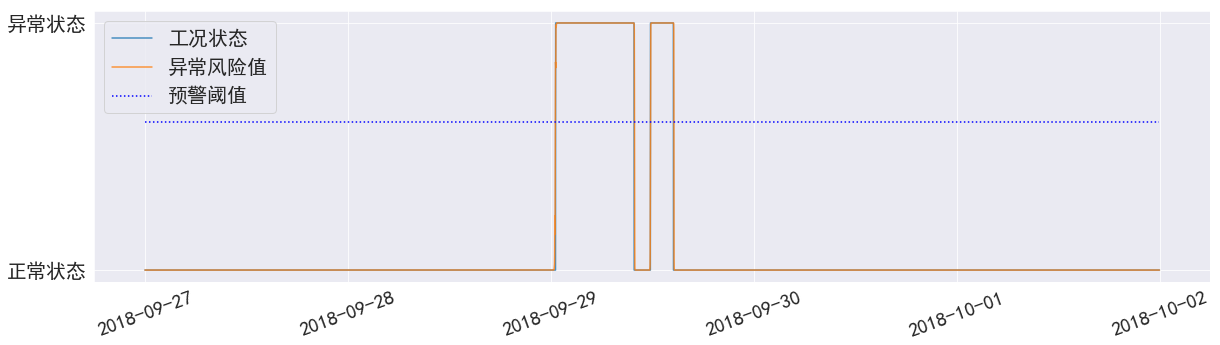

In [133]:
plot_temp_overview(df[(df.index>"2018-09-27")&(df.index<"2018-10-02")])